In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('ML471_S2_Datafile_Concept(in).csv')

c:\Users\madha\PycharmProjects\NLP-ML\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\madha\PycharmProjects\NLP-ML\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\madha\PycharmProjects\NLP-ML\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\madha\PycharmProjects\NLP-ML\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\madha\PycharmProjects\NLP-ML\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

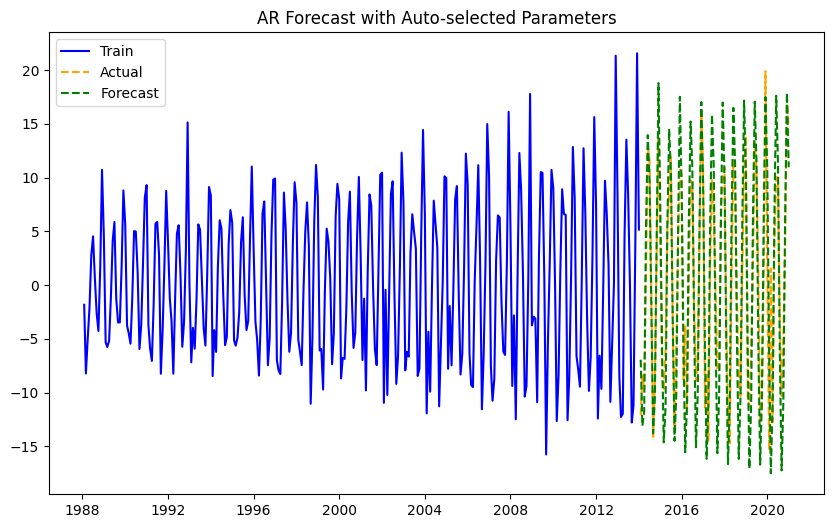

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error

if 'Datetime' in df.columns:
    df['Datetime'] = pd.to_datetime(df['Datetime'], format='%m/%d/%Y')
    df.set_index('Datetime', inplace=True)
series = df['Power_Consumption_diff'].dropna()

train = series.iloc[:312]
test = series.iloc[312:]
best_p = 14 
best_aic = np.inf
for p in range(1, 15):
    res = AutoReg(train, lags=p).fit()
    if res.aic < best_aic:
        best_aic = res.aic
        best_p = p

model = AutoReg(train, lags=14).fit()

lb_test = acorr_ljungbox(model.resid, lags=[1], return_df=True)

forecast = model.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
forecast.index = test.index

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test)) * 100

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Actual', color='orange', linestyle='--')
plt.plot(test.index, forecast, label='Forecast', color='green', linestyle='--')
plt.title('AR Forecast with Auto-selected Parameters')
plt.legend()
plt.show()